# Assignment 4

## Matteo De Francesco

In this notebook we are going to cover the task of the _assignment 4_.    
We will construct a Bayesian Network and build the local conditional probability tables accordingly and then implement the ancestral sampling method over it.

## BN structure

For the structure of Bayesian Network, I constructed it based on my fantasy. I modelled a situation, in a concise way, of a typical student life having cause and effects.    
Looking in depth, I imagined the following situation:



_Our protagonist Joe is invited to a __Party__, and he has to decide if going or not. Since we are still in covid times, the __Mask__ is still a must.    
The weather is not so nice and the __Party__ is outside, together with the pandemic Joe can easily get __Ill__, and if he get home late than it would be difficult to __Wake up__ the morning after.    
Also, this reflects on Joe's next commitments. Joe needs to __Study__ a certain amount of time to get a good __Grade__ and obtain a final __Degree__. During its spare time, he likes also to practice __Sport__ actively, so he could participate in the final __Competition__.    
Also, after each exam taken Joe update its list on how much he __Enjoyed that Subject__.    
Finally, Joe is still uncertain about its future, he needs to decide if __Find Work__ or __Do a PhD__ based on the time took by its studies_



I modelled the situation described above through a Bayesian Network where the variables coincides with the bold terms and the values where chosen by me in a suitable way.    
We can see the structure of the BN below

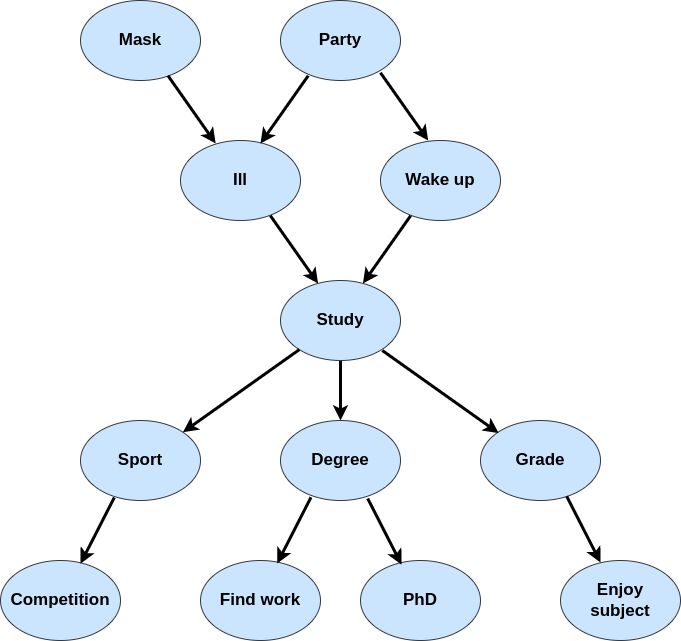

## Variables and values

We can explicitate now for each of the variables involved which are the values that they can assume. We will also abbreviate each variable:

* __Mask__ (__M__): multinomial
  - $m_1 =$ yes;
  - $m_2 =$ under nose;
  - $m_3 =$ no;
* __Party__ (__Pa__): multinomial
  - $pa_1 =$ get late;
  - $pa_2 =$ get early;
  - $pa_3 =$ stay home;
* __Ill__ (__I__): multinomial
  - $i_1 =$ flu and cough;
  - $i_2 =$ fever;
  - $i_3 =$ no;
* __Wake up__ (__Wu__): multinomial, indicating range of hours
  - $wu_1 =$ from 7 to 9 am;
  - $wu_2 =$ from 9 to 10 am;
  - $wu_3 =$ from 10 to 12 am;
  - $wu_4 =$ after 12 am;
* __Study__ (__St__): multinomial, indicating range of hours of study per day
  - $st_1 =$ from 8 to 10 hours per day;
  - $st_2 =$ from 5 to 8 hours per day;
  - $st_3 =$ from 3 to 5 hours per day;
  - $st_4 =$ less than 3 hours per day;
* __Sport__ (__Sp__): multinomial, how much days per week of training
  - $sp_1 =$ 5 times per week;
  - $sp_2 =$ 4 times per week;
  - $sp_3 =$ 3 times per week;
  - $sp_4 =$ 2 times per week;
  - $sp_5 =$ no training;
* __Degree__ (__D__): multinomial, indicating the years taken to get a degree
  - $d_1 =$ 2 years;
  - $d_2 =$ 3 years;
  - $d_3 =$ 4 years;
  - $d_4 =$ 5 years or more;
* __Grade__ (__G__): multinomial, indicating range of grade taken at an exam
  - $g_1 =$ greater than 27;
  - $g_2 =$ from 24 to 27;
  - $g_3 =$ from 21 to 23;
  - $g_4 =$ from 18 to 20;
  - $g_5 =$ less than 18;
* __Competition__ (__C__): multinomial, indicating the position obtained in the competition
  - $c_1 =$ 1st place;
  - $c_2 =$ 2nd place;
  - $c_3 =$ 3rd place;
  - $c_4 =$ 4th or greater;
  - $c_5 =$ no take part;
* __Find Work__ (__W__): multinomial, indicating the range in which you find a work
  - $w_1 =$ less than 1 month;
  - $w_2 =$ from 1 to 3 months;
  - $w_3 =$ after 3 months;
* __PhD__ (__Ph__): binomial, indicating if do or do not a PhD
  - $ph_1 =$ yes;
  - $ph_2 =$ no;
* __Enjoy Subject__ (__Es__): binomial, indicating if do or do not enjoyed a given subject
  - $es_1 =$ yes;
  - $es_2 =$ no;

## Conditional Probability tables

Now, after having fully explicitated all the variables and values involved in our Bayesian Network, we can instantiate all the conditional probabilities tables (CPTs) based on my prior knowledge and a bit of common sense

\begin{array}{c c c}
P(M = m_1) & P(M = m_2) & P(M = m_3) \\
\hline
0.5 & 0.25 & 0.25 
\end{array}

\begin{array}{c c c}
P(Pa = pa_1) & P(Pa = pa_2) & P(Pa = pa_3) \\
\hline
0.5 & 0.35 & 0.15 
\end{array}

\begin{array}{c c | c c c c}
M & Pa & P(I = i_1|M,Pa) & P(I = i_2|M,Pa) & P(I = i_3|M,Pa) \\
\hline
m_1 & pa_1 & 0.3 & 0.15 & 0.55 \\
m_1 & pa_2 & 0.2 & 0.05 & 0.75 \\
m_1 & pa_3 & 0.05 & 0.05 & 0.9 \\
m_2 & pa_1 & 0.4 & 0.2 & 0.4 \\
m_2 & pa_2 & 0.3 & 0.1 & 0.6 \\
m_2 & pa_3 & 0.05 & 0.05 & 0.9 \\
m_3 & pa_1 & 0.6 & 0.3 & 0.1\\
m_3 & pa_2 & 0.5 & 0.2 & 0.3\\
m_3 & pa_3 & 0.05 & 0.05 & 0.9 \\
\end{array}

\begin{array}{c | c c c c}
Pa & P(Wu = wu_1 | Pa) & P(Wu = wu_2 | Pa) & P(Wu = wu_3 | Pa) & P(Wu = wu_4 | Pa) \\
\hline
pa_1 & 0.05 & 0.15 & 0.3 & 0.5 \\
pa_2 & 0.2 & 0.3 & 0.4 & 0.1 \\
pa_3 & 0.5 & 0.35 & 0.15 & 0 \\
\end{array}


\begin{array}{c c | c c c c}
I & Wu & P(St = st_1|I,Wu) & P(St = st_2|I,Wu) & P(St = st_3|I,Wu) & P(St = st_4|I,Wu) \\
\hline
i_1 & wu_1 & 0.1 & 0.4 & 0.3 & 0.2 \\
i_1 & wu_2 & 0.05 & 0.35 & 0.35 & 0.25 \\
i_1 & wu_3 & 0.02 & 0.18 & 0.45 & 0.35 \\
i_1 & wu_4 & 0.01 & 0.09 & 0.35 & 0.55 \\
i_2 & wu_1 & 0.05 & 0.35 & 0.35 & 0.25 \\
i_2 & wu_2 & 0.02 & 0.28 & 0.4 & 0.3 \\
i_2 & wu_3 & 0.02 & 0.18 & 0.3 & 0.5 \\
i_2 & wu_4 & 0.01 & 0.14 & 0.25 & 0.6 \\
i_3 & wu_1 & 0.5 & 0.3 & 0.19 & 0.01 \\
i_3 & wu_2 & 0.4 & 0.25 & 0.25 & 0.1 \\
i_3 & wu_3 & 0.2 & 0.4 & 0.3 & 0.1 \\
i_3 & wu_4 & 0.1 & 0.3 & 0.45 & 0.15 \\
\end{array}


\begin{array}{c | c c c c c}
St & P(Sp = sp_1 | St) & P(Sp = sp_2 | St) & P(Sp = sp_3 | St) & P(Sp = sp_4 | St) & P(Sp = sp_5 | St) \\
\hline
st_1 & 0.01 & 0.09 & 0.2 & 0.3 & 0.4 \\
st_2 & 0.1 & 0.25 & 0.3 & 0.25 & 0.1 \\
st_3 & 0.3 & 0.25 & 0.25 & 0.15 & 0.05 \\
st_4 & 0.5 & 0.25 & 0.15 & 0.09 & 0.01 \\
\end{array}

\begin{array}{c | c c c c}
St & P(D = d_1 | St) & P(D = d_2 | St) & P(D = d_3 | St) & P(D = d_4 | St) \\
\hline
st_1 & 0.3 & 0.5 & 0.15 & 0.05 \\
st_2 & 0.1 & 0.5 & 0.3 & 0.1 \\
st_3 & 0.02 & 0.38 & 0.4 & 0.2 \\
st_4 & 0.01 & 0.14 & 0.25 & 0.6 \\
\end{array}

\begin{array}{c | c c c c c}
St & P(G = g_1 | St) & P(G = g_2 | St) & P(G = g_3 | St) & P(G = g_4 | St) & P(G = g_5 | St) \\
\hline
st_1 & 0.7 & 0.15 & 0.1 & 0.04 & 0.01 \\
st_2 & 0.5 & 0.2 & 0.15 & 0.1 & 0.05 \\
st_3 & 0.2 & 0.25 & 0.3 & 0.15 & 0.1 \\
st_4 & 0.01 & 0.09 & 0.15 & 0.3 & 0.45 \\
\end{array}

\begin{array}{c | c c c c c}
Sp & P(C = c_1 | Sp) & P(C = c_2 | Sp) & P(C = c_3 | Sp) & P(C = c_4 | Sp) & P(C = c_5 | Sp) \\
\hline
sp_1 & 0.65 & 0.15 & 0.1 & 0.09 & 0.01 \\
sp_2 & 0.5 & 0.2 & 0.15 & 0.1 & 0.05 \\
sp_3 & 0.2 & 0.25 & 0.3 & 0.15 & 0.1 \\
sp_4 & 0.02 & 0.08 & 0.15 & 0.35 & 0.4 \\
sp_5 & 0.01 & 0.01 & 0.08 & 0.35 & 0.55 \\
\end{array}


\begin{array}{c | c c c}
D & P(W = w_1 | D) & P(W = w_2 | D) & P(W = w_3 | D) \\
\hline
d_1 & 0.7 & 0.25 & 0.05 \\
d_2 & 0.6 & 0.3 & 0.1 \\
d_3 & 0.4 & 0.4 & 0.2 \\
d_4 & 0.25 & 0.45 & 0.3 \\
\end{array}

\begin{array}{c | c c}
D & P(Ph = ph_1 | D) & P(Ph = ph_2 | D) \\
\hline
d_1 & 0.9 & 0.1 \\
d_2 & 0.75 & 0.25 \\
d_3 & 0.55 & 0.45 \\
d_4 & 0.4 & 0.6 \\
\end{array}

\begin{array}{c | c c}
G & P(Es = es_1 | G) & P(Es = es_2 | G) \\
\hline
g_1 & 0.9 & 0.1 \\
g_2 & 0.75 & 0.25 \\
g_3 & 0.5 & 0.5 \\
g_4 & 0.3 & 0.7 \\
g_5 & 0.1 & 0.9 \\
\end{array}


Just for the sake of understanding, the multinomial probability of variable __Ill__ will depend on __Mask__ and __Party__, e.g. the first entry will mean    

_What is the probability of having flu and cough given that I weared a mask and I went to the party getting late at home?_

And so on for the other variables and values involved. To build those CPTs above I asked myself all the relative questions like above, reasoning on the other values involved when assigning the different probabilities.

Below I show the full Bayesian network with a simplified representation of the conditional probability tables

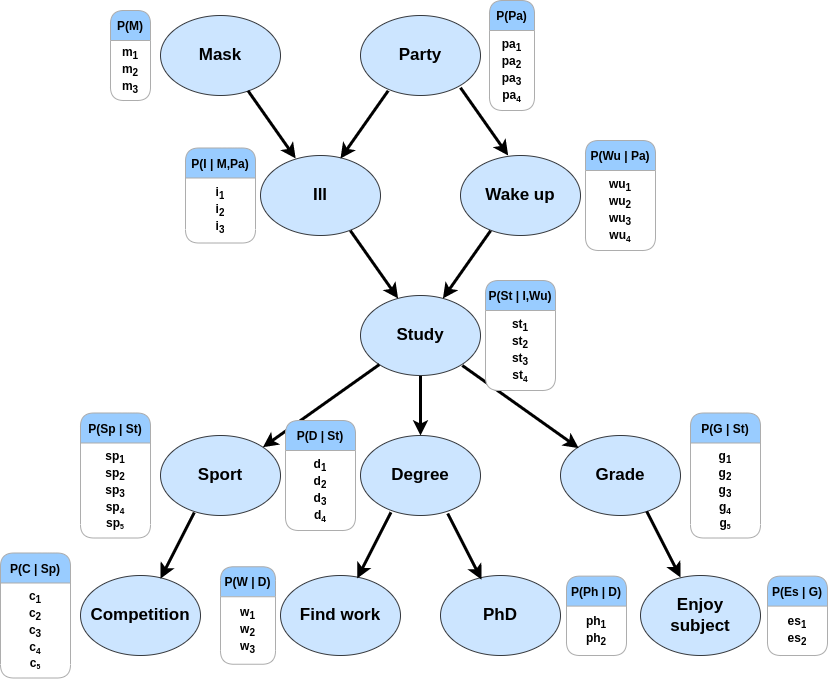

Now that I explained the BN structure and explicitated all the different CPTs involved, we can finally turn our heels to the implementation.

## Implementation

### Imports

In [ ]:
import numpy as np

Since we are doing ancestral sampling, we need only a random number generator $R$ to draw samples from a univariate distribution which changes time to time based on the distribution we have to sample from and the previously sampled values.     
In particular the sampling procedure in our case can be subsumed from the structure of the Bayesian Network and can be summed up here:

\begin{array}{l}
  \tilde{m} \sim P(M) \\
  \tilde{pa} \sim P(Pa) \\
  \tilde{i} \sim P(I \,|\, M=\tilde{m},Pa=\tilde{pa}) \\
  \tilde{wu} \sim P(Wu \,|\, Pa=\tilde{pa}) \\
  \tilde{st} \sim P(St \,|\, Wu=\tilde{wu},Pa=\tilde{pa}) \\
  \tilde{sp} \sim P(Sp \,|\, St=\tilde{st}) \\
  \tilde{d} \sim P(D \,|\, St=\tilde{st}) \\
  \tilde{g} \sim P(G \,|\, St=\tilde{st}) \\
  \tilde{c} \sim P(C \,|\, Sp=\tilde{sp}) \\
  \tilde{w} \sim P(W \,|\, D=\tilde{d}) \\
  \tilde{ph} \sim P(Ph \,|\, D=\tilde{d}) \\
  \tilde{es} \sim P(Es \,|\, G=\tilde{g}) \\
\end{array}

Obtaining in this way a sample

\begin{equation}
  s_l = ( \tilde{m}, \tilde{pa}, \tilde{i}, \tilde{wu}, \tilde{st}, \tilde{sp}, \tilde{d}, \tilde{g}, \tilde{c}, \tilde{w}, \tilde{ph}, \tilde{es} )
\end{equation}

which we know from theory it is a valid sample drawn from the joint distribution of our Bayesian Network, since Ancestral Sampling is a valid sampling method drawing values from the original distribution and with low variance, provided that there are no observed variables

In [ ]:
np.random.seed(42)

Let's construct a dictionary to map the different values into the meanings, to visualize in the end what we obtained from sampling

In [ ]:
# Create dictionary for the mappings values and meaning
mapping = {
    "m1": "yes",
    "m2": "under the nose",
    "m3": "no",
    "pa1": "went to the party and get late at home",
    "pa2": "went to the party but get early at home",
    "pa3": "didn't go to the party",
    "i1": "flu and cough",
    "i2": "a bit of fever",
    "i3": "no symptoms",
    "wu1": "8 am",
    "wu2": "9:30 am",
    "wu3": "11 am",
    "wu4": "1 pm",
    "st1": "9 hours",
    "st2": "7 hours",
    "st3": "4 hours",
    "st4": "only 1 hour",
    "sp1": "train for 5 days in a row",
    "sp2": "train for 4 days",
    "sp3": "train for 3 days",
    "sp4": "train for 2 days",
    "sp5": "hadn't time to train",
    "d1": "less than 3 years",
    "d2": "in 3 years",
    "d3": "in 4 years",
    "d4": "more than 4 years",
    "g1": "hope to get a grade greater than 27",
    "g2": "hope to get a grade between 24 and 27",
    "g3": "hope to get a grade between 21 and 24",
    "g4": "hope to pass the exam with a grade between 18 and 21",
    "g5": "hope to not fail the exam",
    "c1": "hope to win the competition",
    "c2": "hope to take the 2nd place",
    "c3": "hope to take the 3rd place",
    "c4": "hope to arrive at least 4th",
    "c5": "would not take part",
    "w1": "find work in less than 1 month",
    "w2": "find work before 3 months from graduation",
    "w3": "find work after 3 months from graduation",
    "ph1": "do a PhD",
    "ph2": "don't do a PhD",
    "es1": "enjoy the subject",
    "es2": "didn't enjoy the subject"
}

We create two different classes, one representing a node and one representing the entire network to simplify the code later on.    
In this way we get a moreover generalized way to sample from an arbitrary Bayesian Network

In [ ]:
class BayesianNode:

  '''
    Initialize a generic Bayesian node, with:
    - name: a given symbol string
    - values: a list of strings, which are the values that the variable can take
    - probs: a list of numbers representing the probabilities (if the variable is not conditioned by anyone), 
      otherwise a dictionary with the given dependency as a key, and a list of numbers representing the probabilities as values
    - dependencies: a list of strings, containing the variables upon which this variable depends
  '''
  def __init__(self, name, values, probs, dependencies):
    self.name = name
    self.values = values
    self.probs = probs
    self.dependencies = dependencies
    self.depends = []

  # Add BayesianNode upon which this node depends on
  def add_dependency(self, node):
    self.depends.append(node)
    
  '''
    Given a random extracted number 0 < R < 1, performs univariate sampling from the according distribution.
    If the variable is not conditioned the sample is retrieved immediately, otherwise the sampled values
    of the conditioning variables are retrieved from the parameter values
  '''
  def getprob(self, R, values):
    sum = 0
    if len(self.dependencies) == 0:
      for i in range(len(self.probs)):
        sum += self.probs[i]
        if sum > R:
          # Sample this value
          self.sample = self.values[i]
          self.prob = self.probs[i]
          break
      return (self.sample, self.prob)

    else:
      # Create key:
      key = ','.join(values)
      probabs = self.probs[key]
      for i in range(len(probabs)):
        sum += probabs[i]
        if sum > R:
          # Sample this value
          self.sample = self.values[i]
          self.prob = probabs[i]
          break
      return (self.sample, self.prob)

In [ ]:
class BayesianNet:

  '''
    Initialize a Bayesian network
    - nodes: list of BayesianNode
    - names: list of strings, representing the name of the variables in the Net

    Mainly used to perform sampling in a more efficient and compact way
  '''
  def __init__(self, nodes, names):
    self.nodes = nodes
    self.names = names
    self.values = []
    self.samples = []

  def update_sample(self, name, value): 
    self.values.append({name: value})


Now we can construct the CPTs in code together with the different nodes to know what is the outcome probability when we draw samples

In [ ]:
# CPT of Mask
Mask = ["m1", "m2", "m3"]
Mask_probs = [.5, .25, .25]

Mask_node = BayesianNode("M", Mask, Mask_probs, [])

# CPT of Party
Party = ["pa1", "pa2", "pa3"]
Party_probs = [.5, .35, .15]

Party_node = BayesianNode("Pa", Party, Party_probs, [])

# CPT of Ill
Ill = ["i1", "i2", "i3"]
Ill_probs = {}

# Construct CPT for Ill
for i in range(len(Mask)):
  for j in range(len(Party)):
    if Mask[i] == "m1" and Party[j] == "pa1":
      Ill_probs[Mask[i] + "," + Party[j]] = [.3, .15, .55]

    elif Mask[i] == "m1" and Party[j] == "pa2":
      Ill_probs[Mask[i] + "," + Party[j]] = [.2, .05, .75] 

    elif Mask[i] == "m1" and Party[j] == "pa3":
      Ill_probs[Mask[i] + "," + Party[j]] = [.05, .05, .9] 
      
    elif Mask[i] == "m2" and Party[j] == "pa1":
      Ill_probs[Mask[i] + "," + Party[j]] = [.4, .2, .4] 
      
    elif Mask[i] == "m2" and Party[j] == "pa2":
      Ill_probs[Mask[i] + "," + Party[j]] = [.3, .1, .6]
      
    elif Mask[i] == "m2" and Party[j] == "pa3":
      Ill_probs[Mask[i] + "," + Party[j]] = [.05, .05, .9] 

    elif Mask[i] == "m3" and Party[j] == "pa1":
      Ill_probs[Mask[i] + "," + Party[j]] = [.6, .3, .1]
      
    elif Mask[i] == "m3" and Party[j] == "pa2":
      Ill_probs[Mask[i] + "," + Party[j]] = [.5, .2, .3] 

    elif Mask[i] == "m3" and Party[j] == "pa3":
      Ill_probs[Mask[i] + "," + Party[j]] = [.05, .05, .9]

Ill_node = BayesianNode("I", Ill, Ill_probs, ["M", "Pa"])

Ill_node.add_dependency(Mask_node)
Ill_node.add_dependency(Party_node)
      

# CPT of WakeUp
Wakeup = ["wu1", "wu2", "wu3", "wu4"]
Wakeup_probs = {}

# Construct CPT for Wakeup
for i in range(len(Party)):
  if Party[i] == "pa1":
    Wakeup_probs[Party[i]] = [.05, .15, .3, .5]

  elif Party[i] == "pa2":
    Wakeup_probs[Party[i]] = [.2, .3, .4, .1]

  elif Party[i] == "pa3":
    Wakeup_probs[Party[i]] = [.5, .35, .15, 0]

Wakeup_node = BayesianNode("Wu", Wakeup, Wakeup_probs, ["Pa"])

Wakeup_node.add_dependency(Party_node)
  
# CPT of Study
Study = ["st1", "st2", "st3", "st4"]
Study_probs = {}

# Construct CPT for Ill
for i in range(len(Ill)):
  for j in range(len(Wakeup)):
    if Ill[i] == "i1" and Wakeup[j] == "wu1":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.1, .4, .3, .2] 

    elif Ill[i] == "i1" and Wakeup[j] == "wu2":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.05, .35, .35, .25] 

    elif Ill[i] == "i1" and Wakeup[j] == "wu3":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.02, .18, .45, .35]

    elif Ill[i] == "i1" and Wakeup[j] == "wu4":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.01, .09, .35, .55]
      
    elif Ill[i] == "i2" and Wakeup[j] == "wu1":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.05, .35, .35, .25] 

    elif Ill[i] == "i2" and Wakeup[j] == "wu2":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.02, .28, .4, .3]

    elif Ill[i] == "i2" and Wakeup[j] == "wu3":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.02, .18, .3, .5] 

    elif Ill[i] == "i2" and Wakeup[j] == "wu4":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.01, .14, .25, .6]

    elif Ill[i] == "i3" and Wakeup[j] == "wu1":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.5, .3, .19, .01]

    elif Ill[i] == "i3" and Wakeup[j] == "wu2":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.4, .25, .25, .1] 

    elif Ill[i] == "i3" and Wakeup[j] == "wu3":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.2, .4, .3, .1]

    elif Ill[i] == "i3" and Wakeup[j] == "wu4":
      Study_probs[Ill[i] + "," + Wakeup[j]] = [.1, .3, .45, .15]

Study_node = BayesianNode("St", Study, Study_probs, ["I", "Wu"])

Study_node.add_dependency(Ill_node)
Study_node.add_dependency(Wakeup_node)


# CPT of Sport
Sport = ["sp1", "sp2", "sp3", "sp4", "sp5"]
Sport_probs = {}

# Construct CPT for Sport
for i in range(len(Study)):
  if Study[i] == "st1":
    Sport_probs[Study[i]] = [.01, .09, .2, .3, .4]

  elif Study[i] == "st2":
    Sport_probs[Study[i]] = [.1, .25, .3, .25, .1]

  elif Study[i] == "st3":
    Sport_probs[Study[i]] = [.3, .25, .25, .15, .05]

  elif Study[i] == "st4":
    Sport_probs[Study[i]] = [.5, .25, .15, .09, .01]

Sport_node = BayesianNode("Sp", Sport, Sport_probs, ["St"])

Sport_node.add_dependency(Study_node)

# CPT of Degree
Degree = ["d1", "d2", "d3", "d4", "d5"]
Degree_probs = {}

# Construct CPT for Degree
for i in range(len(Study)):
  if Study[i] == "st1":
    Degree_probs[Study[i]] = [.3, .5, .15, .05]

  elif Study[i] == "st2":
    Degree_probs[Study[i]] = [.1, .5, .3, .1]

  elif Study[i] == "st3":
    Degree_probs[Study[i]] = [.02, .38, .4, .2]

  elif Study[i] == "st4":
    Degree_probs[Study[i]] = [.01, .14, .25, .6]

Degree_node = BayesianNode("D", Degree, Degree_probs, ["St"])

Degree_node.add_dependency(Study_node)

# CPT of Grade
Grade = ["g1", "g2", "g3", "g4", "g5"]
Grade_probs = {}

# Construct CPT for Grade
for i in range(len(Study)):
  if Study[i] == "st1":
    Grade_probs[Study[i]] = [.7, .15, .1, .04, .01]

  elif Study[i] == "st2":
    Grade_probs[Study[i]] = [.5, .2, .15, .1, .05]

  elif Study[i] == "st3":
    Grade_probs[Study[i]] = [.2, .25, .3, .15, .1]

  elif Study[i] == "st4":
    Grade_probs[Study[i]] = [.01, .09, .15, .3, .45]


Grade_node = BayesianNode("G", Grade, Grade_probs, ["St"])

Grade_node.add_dependency(Study_node)

# CPT of Competition
Competition = ["c1", "c2", "c3", "c4", "c5"]
Competition_probs = {}

# Construct CPT for Competition
for i in range(len(Sport)):
  if Sport[i] == "sp1":
    Competition_probs[Sport[i]] = [.65, .15, .1, .09, .01]

  elif Sport[i] == "sp2":
    Competition_probs[Sport[i]] = [.5, .2, .15, .1, .05]

  elif Sport[i] == "sp3":
    Competition_probs[Sport[i]] = [.2, .25, .3, .15, .1]

  elif Sport[i] == "sp4":
    Competition_probs[Sport[i]] = [.02, .08, .15, .35, .4]

  elif Sport[i] == "sp5":
    Competition_probs[Sport[i]] = [.01, .01, .08, .35, .55]

Competition_node = BayesianNode("C", Competition, Competition_probs, ["Sp"])

Competition_node.add_dependency(Sport_node)

# CPT of Work
Work = ["w1", "w2", "w3"]
Work_probs = {}

# Construct CPT for Work
for i in range(len(Degree)):
  if Degree[i] == "d1":
    Work_probs[Degree[i]] = [.7, .25, .05]

  elif Degree[i] == "d2":
    Work_probs[Degree[i]] = [.6, .3, .1]

  elif Degree[i] == "d3":
    Work_probs[Degree[i]] = [.4, .4, .2]

  elif Degree[i] == "d4":
    Work_probs[Degree[i]] = [.25, .45, .3]

Work_node = BayesianNode("W", Work, Work_probs, ["D"])

Work_node.add_dependency(Degree_node)

# CPT of PhD
PhD = ["ph1", "ph2"]
PhD_probs = {}

# Construct CPT for PhD
for i in range(len(Degree)):
  if Degree[i] == "d1":
    PhD_probs[Degree[i]] = [.9, .1]

  elif Degree[i] == "d2":
    PhD_probs[Degree[i]] = [.75, .25]

  elif Degree[i] == "d3":
    PhD_probs[Degree[i]] = [.55, .45]

  elif Degree[i] == "d4":
    PhD_probs[Degree[i]] = [.4, .6]

PhD_node = BayesianNode("Ph", PhD, PhD_probs, ["D"])

PhD_node.add_dependency(Degree_node)

# CPT of EnjoySubject
EnjoySubject = ["es1", "es2"]
EnjoySubject_probs = {}

# Construct CPT for EnjoySubject
for i in range(len(Grade)):
  if Grade[i] == "g1":
    EnjoySubject_probs[Grade[i]] = [.9, .1]

  elif Grade[i] == "g2":
    EnjoySubject_probs[Grade[i]] = [.75, .25]

  elif Grade[i] == "g3":
    EnjoySubject_probs[Grade[i]] = [.5, .5]

  elif Grade[i] == "g4":
    EnjoySubject_probs[Grade[i]] = [.3, .7]

  elif Grade[i] == "g5":
    EnjoySubject_probs[Grade[i]] = [.1, .9]

EnjoySubject_node = BayesianNode("Es", EnjoySubject, EnjoySubject_probs, ["G"])

EnjoySubject_node.add_dependency(Grade_node)

print("CPTs\n")

print("Mask")
print(Mask_probs)
print("Party")
print(Party_probs)
print("Ill")
print(Ill_probs)
print("Wakeup")
print(Wakeup_probs)
print("Study")
print(Study_probs)
print("Sport")
print(Sport_probs)
print("Degree")
print(Degree_probs)
print("Grade")
print(Grade_probs)
print("Competition")
print(Competition_probs)
print("Work")
print(Work_probs)
print("PhD")
print(PhD_probs)
print("Enjoy Subject")
print(EnjoySubject_probs)

CPTs

Mask
[0.5, 0.25, 0.25]
Party
[0.5, 0.35, 0.15]
Ill
{'m1,pa1': [0.3, 0.15, 0.55], 'm1,pa2': [0.2, 0.05, 0.75], 'm1,pa3': [0.05, 0.05, 0.9], 'm2,pa1': [0.4, 0.2, 0.4], 'm2,pa2': [0.3, 0.1, 0.6], 'm2,pa3': [0.05, 0.05, 0.9], 'm3,pa1': [0.6, 0.3, 0.1], 'm3,pa2': [0.5, 0.2, 0.3], 'm3,pa3': [0.05, 0.05, 0.9]}
Wakeup
{'pa1': [0.05, 0.15, 0.3, 0.5], 'pa2': [0.2, 0.3, 0.4, 0.1], 'pa3': [0.5, 0.35, 0.15, 0]}
Study
{'i1,wu1': [0.1, 0.4, 0.3, 0.2], 'i1,wu2': [0.05, 0.35, 0.35, 0.25], 'i1,wu3': [0.02, 0.18, 0.45, 0.35], 'i1,wu4': [0.01, 0.09, 0.35, 0.55], 'i2,wu1': [0.05, 0.35, 0.35, 0.25], 'i2,wu2': [0.02, 0.28, 0.4, 0.3], 'i2,wu3': [0.02, 0.18, 0.3, 0.5], 'i2,wu4': [0.01, 0.14, 0.25, 0.6], 'i3,wu1': [0.5, 0.3, 0.19, 0.01], 'i3,wu2': [0.4, 0.25, 0.25, 0.1], 'i3,wu3': [0.2, 0.4, 0.3, 0.1], 'i3,wu4': [0.1, 0.3, 0.45, 0.15]}
Sport
{'st1': [0.01, 0.09, 0.2, 0.3, 0.4], 'st2': [0.1, 0.25, 0.3, 0.25, 0.1], 'st3': [0.3, 0.25, 0.25, 0.15, 0.05], 'st4': [0.5, 0.25, 0.15, 0.09, 0.01]}
Degree
{'st1': [0

Now we create the Bayesian Network using the nodes previously defined and the names given to them

In [ ]:
Nodes = [Mask_node, Party_node, Ill_node, Wakeup_node, Study_node, Sport_node, Degree_node, Grade_node, Competition_node, Work_node, PhD_node, EnjoySubject_node]
nams = ["M", "Pa", "I", "Wu", "St", "Sp", "D", "G", "C", "W", "Ph", "Es"]

bayesian_net = BayesianNet(Nodes, nams)

Let's draw the samples

In [ ]:
samples_drawn = []

num_samples = 10

for _ in range(num_samples):
  sampling = ()
  for _2, node in enumerate(bayesian_net.nodes):
    R = np.random.rand()
    depends = node.dependencies
    if len(depends) == 0:
      sample, prob = node.getprob(R, depends)
      print(f"Sample {sample}")
    else:
      # Recover sampled values from previous nodes
      values = []
      for val in depends:
        j = bayesian_net.names.index(val)
        values.append(bayesian_net.nodes[j].sample)
      sample, prob = node.getprob(R, values)
    sampling += (sample,)

  samples_drawn.append(sampling)

Let's visualize the samples obtained in a phrase describing the outcome. We use the mappings previously defined to retrieve the meanings of the sampled values

In [ ]:
for i, sample in enumerate(samples_drawn):
  print(f"Sample {i+1}\n")
  print("\
  Joe put its mask {} and he {}. Due to this, the day after he woke up at {}, with {}.\n\
  So he studied for {}. That week, he was able to {}, so that he {} in the competition.\n\
  Keeping the study rhytm in this way, he {} and adding to its list {}. Finally, he hopes\n\
  to complete the degree {}, and after that {}, or {}\n".format(mapping[sample[0]], 
                                                                mapping[sample[1]],
                                                                mapping[sample[3]],
                                                                mapping[sample[2]],
                                                                mapping[sample[4]],
                                                                mapping[sample[5]],
                                                                mapping[sample[8]],
                                                                mapping[sample[7]],
                                                                mapping[sample[11]],
                                                                mapping[sample[6]],
                                                                mapping[sample[9]],
                                                                mapping[sample[10]]))

Sample 1

  Joe put its mask yes and he didn't go to the party. Due to this, the day after he woke up at 9:30 am, with no symptoms.
  So he studied for 9 hours. That week, he was able to train for 3 days, so that he hope to take the 3rd place in the competition.
  Keeping the study rhytm in this way, he hope to get a grade between 21 and 24 and adding to its list didn't enjoy the subject. Finally, he hopes
  to complete the degree less than 3 years, and after that find work before 3 months from graduation, or do a PhD

Sample 2

  Joe put its mask no and he went to the party and get late at home. Due to this, the day after he woke up at 9:30 am, with flu and cough.
  So he studied for 7 hours. That week, he was able to train for 3 days, so that he hope to take the 3rd place in the competition.
  Keeping the study rhytm in this way, he hope to get a grade greater than 27 and adding to its list enjoy the subject. Finally, he hopes
  to complete the degree in 3 years, and after that find 

We can now discuss the results obtained. We built up the above phrases to better understand what's going on.    
Let's take for example the first sample created.    
John wear the mask and did not go to the party. We can see moreover that the assigned conditional probabilities for __Wakeup__ and __Ill__ behave correctly, giving us a wake up at 9.30 am and no symptoms of illness. Instead if we take a look at Sample 5, Joe wake up without illness but at 1 am, since he got late at home after the party. Or in the sample 9, he got late and even wear the mask under the nose, resulting in a flu and cough the day after, even with an early wake up.    
Of course we rely on a random number generator so we cannot be full precise.   
Going on we can see that Joe study 9 hours per day, and this limit his ability of training to 3 times in a week. Instead in sample 8 he studies only 1 hour per day and he trains 5 days in a row, while in sample 9 he still studies 9 hours per day and so he was not able to train that week.    
So also here probabilities are drawn moreover accordingly to what happens.   
Always referring to the first sample, the 3 days of training result in a hope of arrival 3rd in the competition, which is fair.    
Instead we see how the study rhytm of 9 hours per day does not result in a very good grade (between 21 and 24, but for example in sample 9 the grade is more than 27 with the same hours of study), but he hopes to get a degree before the 3 years standard time, linked with the result of probably doing a PhD or find a work before 3 months from graduation.

## Conclusion

We can conclude by saying that of course the meaning of the samples is not always perfect, due to the probabilities set by hand and from the random number generator.    
Setting different values of probabilities maybe would have resulted in different outcome for the samples, moreover more coherent, but in general the value set by us behave quite accordingly to the common sense of anyone thinking about this specific described domain.